In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [16]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
from sklearn.ensemble import RandomForestClassifier

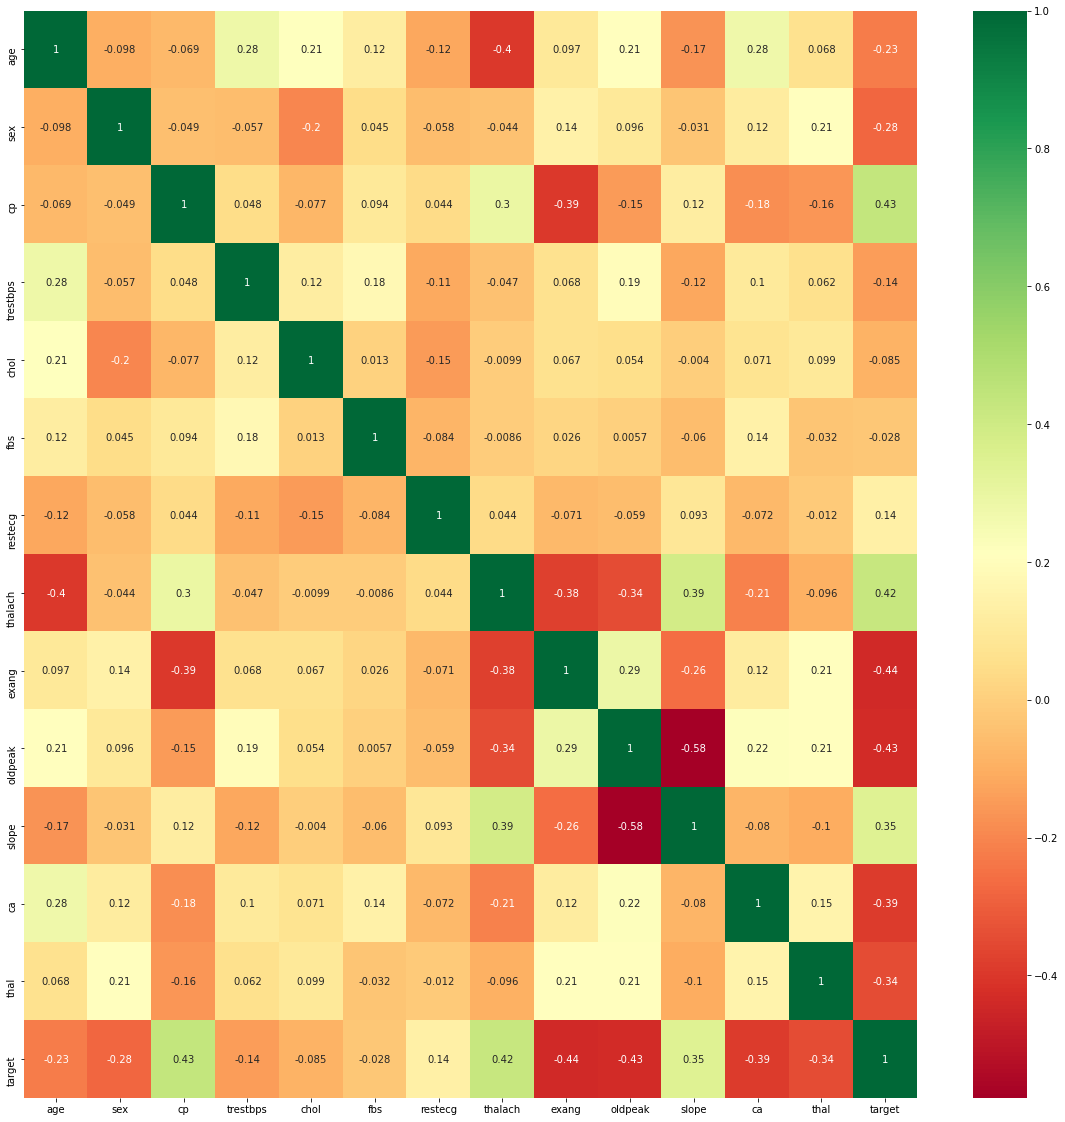

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

corrmat =df.corr() #for correlation between features
top_corr=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d8c1b8a10>,
      dtype=object)

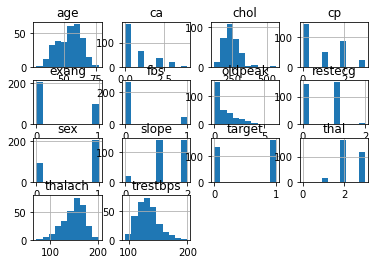

In [23]:
df.hist()

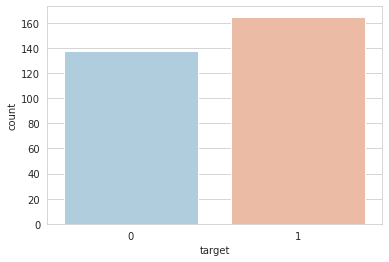

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df,palette='RdBu_r') #check if data set is balanced or not

In [36]:
#convert categorical feature into dummies
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','exang','slope','restecg','ca','thal'])

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
StandardScaler=StandardScaler()
columns_scale=['age','thalach','oldpeak','chol','trestbps']
dataset[columns_scale]=StandardScaler.fit_transform(dataset[columns_scale]) #reducing or adjusting distribution

In [41]:
y=dataset['target']
X=dataset.drop(['target'],axis=1)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

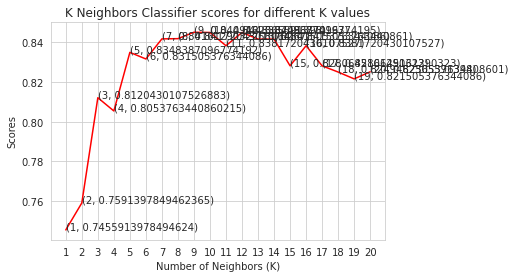

In [51]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
#plt.figure(figsize=(40,20))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

In [56]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8448387096774195

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [60]:
score.mean()

0.8281720430107526